In [24]:
%reload_ext nb_black

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\For-Fun-LoL-Data
['.git', '.gitignore', '.ipynb_checkpoints', 'high_diamond_ranked_10min.csv', 'Lol Data.zip', 'LoL EDA.ipynb', 'README.md']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# the data set contains stats 10 min into diamond ranked games (~10k)
# data obtained from https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min
lol = pd.read_csv("high_diamond_ranked_10min.csv")
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
### Drop all red columns, focus solely on blue side.
blue_lol = lol[lol.columns.drop(list(lol.filter(regex="red")))]
blue_lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

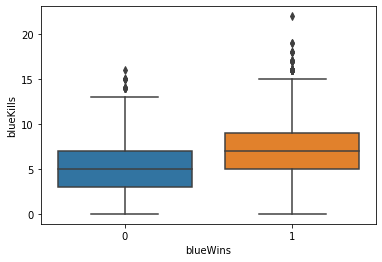

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
sns.boxplot("blueWins", "blueKills", data=blue_lol)
plt.show()

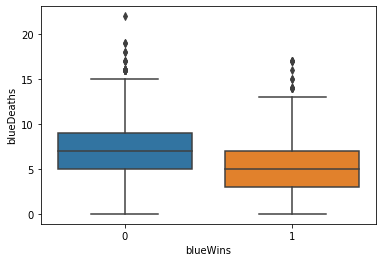

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
sns.boxplot("blueWins", "blueDeaths", data=blue_lol)
plt.show()

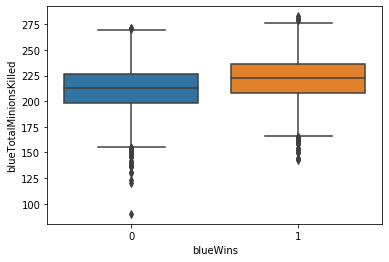

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
sns.boxplot("blueWins", "blueTotalMinionsKilled", data=blue_lol)
plt.show()

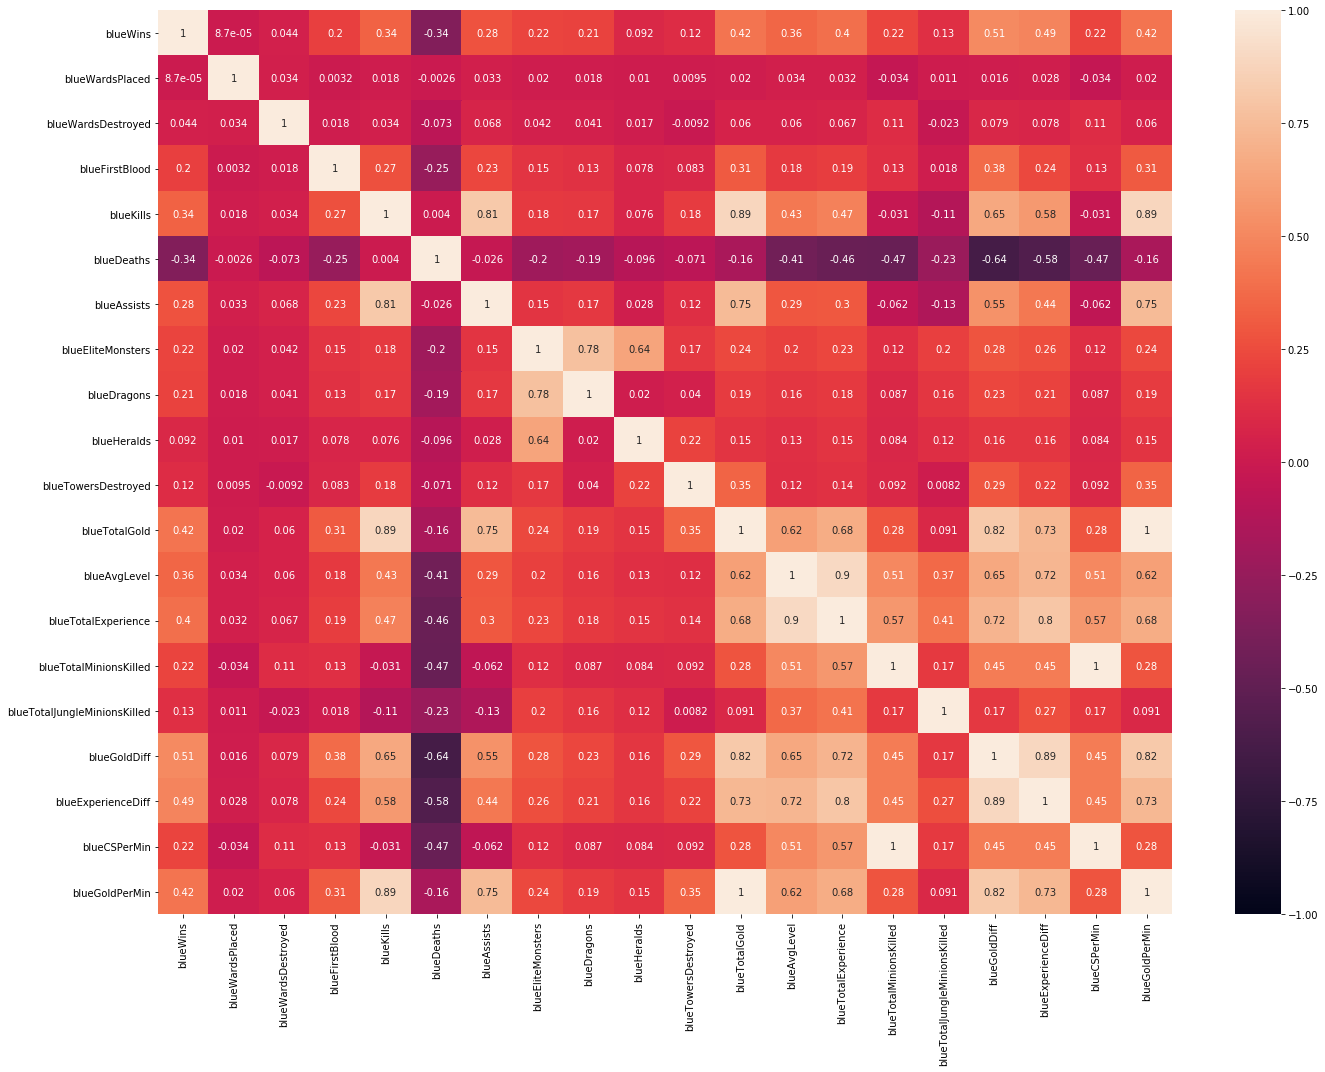

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(20, 15))
sns.heatmap(blue_lol.drop(columns=["gameId"]).corr(), vmin=-1.0, vmax=1.0, annot=True)
plt.tight_layout()
plt.show()

In [30]:
win = blue_lol[blue_lol["blueWins"] == 1]
lose = blue_lol[blue_lol["blueWins"] == 0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
win.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15899,7.0,18161,225,42,698,101,22.5,1589.9
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7
12,4515594785,1,18,1,1,7,1,11,1,1,...,0,17865,7.4,19102,238,53,3274,1659,23.8,1786.5
14,4516505202,1,15,3,1,4,4,4,0,0,...,0,15722,6.8,17896,224,51,-470,-187,22.4,1572.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
lose.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

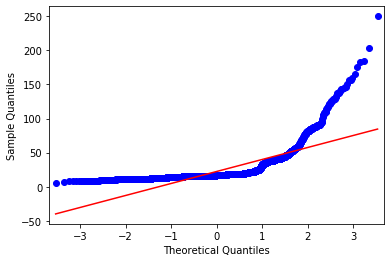

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
qqplot(win["blueWardsPlaced"], line="s")
plt.show()

DescribeResult(nobs=4930, minmax=(5, 250), mean=22.289858012170384, variance=309.67271107742107, skewness=4.287780025136976, kurtosis=25.98049790284806)


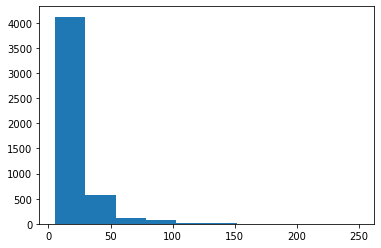

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
plt.hist(win["blueWardsPlaced"])
print(stats.describe(win["blueWardsPlaced"]))

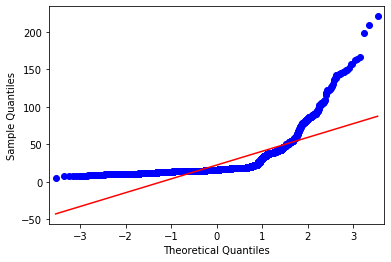

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
qqplot(lose["blueWardsPlaced"], line="s")
plt.show()

DescribeResult(nobs=4930, minmax=(5, 250), mean=22.289858012170384, variance=309.67271107742107, skewness=4.287780025136976, kurtosis=25.98049790284806)


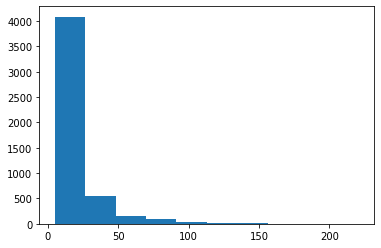

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
plt.hist(lose["blueWardsPlaced"])
print(stats.describe(win["blueWardsPlaced"]))